In [1]:
import sys
sys.path.append("../py")
import transitTools
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
totalObservingTimeInMinutes = 30*60
samplingRatePerMinute = 1
time = arange(0, totalObservingTimeInMinutes, samplingRatePerMinute)

In [3]:
noisecurve = loadtxt('../data/noisecurve_4_0.txt')

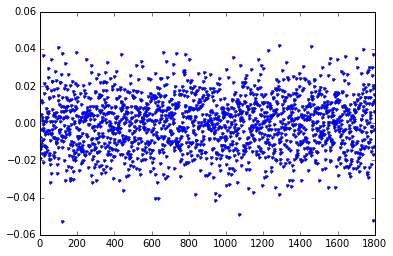

In [9]:
plot(noisecurve, '.')

In [5]:
print noisecurve

[-0.01865309 -0.01368484 -0.00733591 ...,  0.01267294 -0.01214486
  0.00668454]


In [6]:
noisecurve?

In [7]:
stdnoise=std(noisecurve)

In [8]:
print stdnoise

0.0146153649853


In [10]:
reshape?

In [48]:
def binning(input, binTime=10):
    n=len(input)
    output = zeros(n/binTime)
    for i in range (n/binTime):
        output[i] = mean(input[i*binTime:(i+1)*binTime])
    return output



def binning_new(input, binTime=10):
    n=len(input)
    output = zeros(n/binTime)
    output_long = zeros(n)
    for i in range (n/binTime):
        output[i] = median(input[i*binTime:(i+1)*binTime])
        output_long[i*binTime:(i+1)*binTime] = output[i]
    return output, output_long

In [25]:
binning(noisecurve)

array([ -5.74588756e-03,  -1.21168031e-03,  -4.43456916e-03,
         2.92420615e-03,   5.66893681e-03,  -5.46112594e-03,
         2.03280323e-03,   3.62772633e-04,  -1.44824205e-03,
         2.43248650e-04,   2.93943286e-03,  -2.91606732e-04,
         1.28405151e-03,   4.02516127e-03,   4.56530614e-03,
        -4.17885693e-03,  -3.63801209e-03,  -4.80246988e-03,
         6.59695017e-04,   2.04351488e-03,  -7.34885430e-03,
        -2.52310694e-03,  -8.84394336e-03,   2.56533751e-03,
         5.36995664e-03,  -1.97500161e-04,  -1.15308044e-03,
         2.64914936e-03,  -8.74689436e-03,  -4.79076084e-03,
        -4.56899311e-03,   2.34164023e-03,   2.17471790e-03,
        -7.61788534e-04,   3.22861639e-03,   1.78263864e-03,
         8.95124782e-05,  -4.95354996e-03,  -3.73304429e-04,
        -6.68130613e-03,   5.87009846e-03,   1.34302819e-03,
        -3.64259109e-03,   6.96795776e-03,  -3.44840842e-03,
        -1.51632273e-03,   2.47675897e-03,  -9.93543309e-03,
        -2.33324800e-03,

In [52]:
binNoise,binNoise_long=binning_new(noisecurve)
print len(binNoise_long)


1799


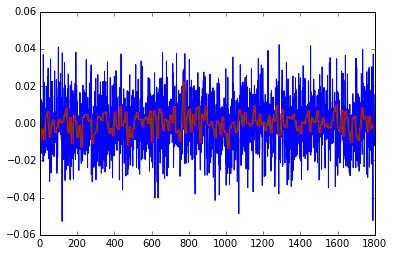

In [53]:
plot (noisecurve)
plot (arange(179)*10,binNoise)
plot (binNoise_long)

In [56]:
print len(noisecurve)
noiseDiff = noisecurve-binNoise_long

1799


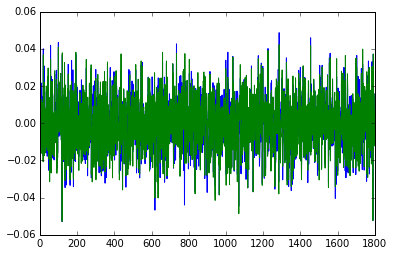

In [58]:
plot (noiseDiff)
plot (noisecurve)

In [18]:
len(binNoise)

179

In [28]:
stdnoise=std(noisecurve)

In [29]:
stdbin=std(binNoise)

In [30]:
print stdnoise, stdbin

0.0146153649853 0.0042359984996


In [32]:
print stdnoise/stdbin

3.45027624223


In [33]:
print sqrt(10)

3.16227766017


In [34]:
#now try pink noise

In [35]:
pinkcurve = loadtxt('../data/noisecurve_4_1.txt')

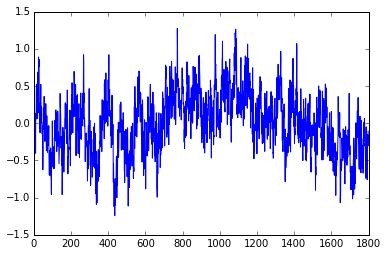

In [36]:
plot (pinkcurve)

In [37]:
binPink = binning(pinkcurve)

In [38]:
print std(pinkcurve), std(binPink)

0.399553637559 0.330970551135


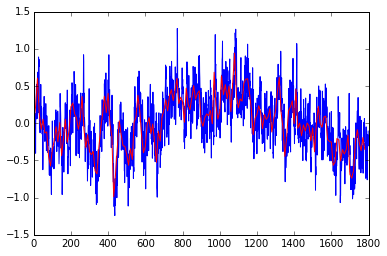

In [41]:
plot (pinkcurve)
plot (arange(179)*10, binPink, color="r")

In [59]:
binPink,binPink_long=binning_new(pinkcurve)

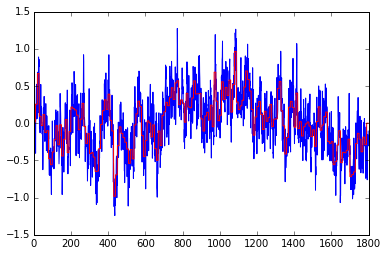

In [60]:
plot (pinkcurve)
plot (binPink_long, color="r")

In [61]:
pinkDiff = pinkcurve-binPink_long

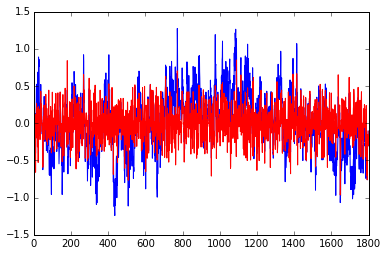

In [64]:
plot (pinkcurve)
plot (pinkDiff, color="r")